<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, if it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


In [1]:
!pip install yfinance
#!pip install pandas

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e4e2041661a27b2ef85e97e3e8e1939341a51b1d156cbee29a910032b3058514
  Stored in directory: c:\users\crusa\appdata\local\pip\cache\wheels\7e\d5\f4\f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=da0d53ae80f397e76eec9ff48c168b2dea847e31f324943d3442f108ef93df7f
  Stored in directory: c:\users\crusa\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

We can get the <code>'country'</code> using the key country


In [5]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [22]:
apple_share_price_data = apple.history(period="9y")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [23]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-06-22,17.782791,17.879530,17.671618,17.876766,284471600,0.0,0.0
2012-06-25,17.729353,17.806131,17.516528,17.528812,304382400,0.0,0.0
2012-06-26,17.546008,17.643055,17.423165,17.567507,276536400,0.0,0.0
2012-06-27,17.658713,17.712150,17.564125,17.643358,202997200,0.0,0.0
2012-06-28,17.556454,17.628009,17.370346,17.475990,282836400,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [24]:
apple_share_price_data.reset_index(inplace=True)

In [25]:
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-06-22,17.782791,17.879530,17.671618,17.876766,284471600,0.0,0.0
1,2012-06-25,17.729353,17.806131,17.516528,17.528812,304382400,0.0,0.0
2,2012-06-26,17.546008,17.643055,17.423165,17.567507,276536400,0.0,0.0
3,2012-06-27,17.658713,17.712150,17.564125,17.643358,202997200,0.0,0.0
4,2012-06-28,17.556454,17.628009,17.370346,17.475990,282836400,0.0,0.0


We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

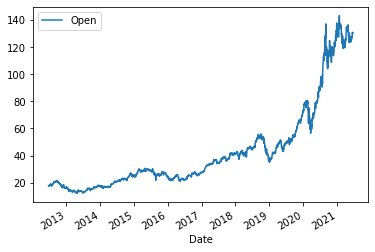

In [26]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [27]:
apple.dividends

Date
2012-08-09    0.094643
2012-11-07    0.094643
2013-02-07    0.094643
2013-05-09    0.108929
2013-08-08    0.108929
2013-11-06    0.108929
2014-02-06    0.108929
2014-05-08    0.117500
2014-08-07    0.117500
2014-11-06    0.117500
2015-02-05    0.117500
2015-05-07    0.130000
2015-08-06    0.130000
2015-11-05    0.130000
2016-02-04    0.130000
2016-05-05    0.142500
2016-08-04    0.142500
2016-11-03    0.142500
2017-02-09    0.142500
2017-05-11    0.157500
2017-08-10    0.157500
2017-11-10    0.157500
2018-02-09    0.157500
2018-05-11    0.182500
2018-08-10    0.182500
2018-11-08    0.182500
2019-02-08    0.182500
2019-05-10    0.192500
2019-08-09    0.192500
2019-11-07    0.192500
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
Name: Dividends, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

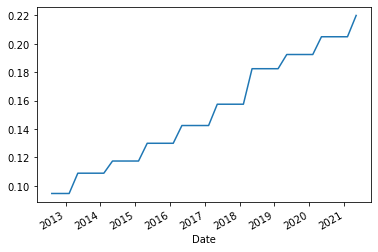

In [28]:
apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [29]:
amd = yf.Ticker("AMD")

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [31]:
amd_info = amd.info
amd_info["country"]

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [32]:
amd_info["sector"]

'Technology'

<b>Question 3</b> Find the max of the <code>Volume</code> column of AMD using the `history` function, set the <code>period</code> to max.


In [35]:
amd_data = amd.history(period="max")
amd_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [36]:
amd_data.Volume.max()

325058400

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
